In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


def make_spirals(n_samples=500, noise=0.1, random_state=42):
    """Generuje dane w ksztalcie spiral."""
    np.random.seed(random_state)
    n = n_samples // 2
    theta = np.linspace(0, 4 * np.pi, n)
    r = theta / (4 * np.pi)

    x1 = r * np.cos(theta) + noise * np.random.randn(n)
    y1 = r * np.sin(theta) + noise * np.random.randn(n)
    x2 = -r * np.cos(theta) + noise * np.random.randn(n)
    y2 = -r * np.sin(theta) + noise * np.random.randn(n)

    X = np.vstack([
        np.column_stack([x1, y1]),
        np.column_stack([x2, y2])
    ])
    y = np.array([0] * n + [1] * n)
    return X, y


def plot_decision_boundary(model, X, y, ax, title=""):
    """Rysuje granice decyzyjna modelu."""
    h = 0.02  # krok siatki
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdYlBu")
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="RdYlBu", edgecolors="black")
    ax.set_title(title)


def visualize_tree_splits(tree, X, y, ax):
    """Wizualizuje kolejne podzialy drzewa."""
    # TODO: Rekurencyjnie narysuj linie podzialow
    # Uzyj tree.tree_.feature, tree.tree_.threshold
    tree_ = tree.tree_

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="RdYlBu",
               edgecolors="black", s=15)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks([])
    ax.set_yticks([])

    def recurse(node_id, x_min, x_max, y_min, y_max, depth):
        feature = tree_.feature[node_id]
        threshold = tree_.threshold[node_id]

        if feature == -2: #lisc
            return

        left_child = tree_.children_left[node_id]
        right_child = tree_.children_right[node_id]

        if feature == 0:
            ax.plot([threshold, threshold], [y_min, y_max],
                    linestyle="--", color="k", linewidth=1, alpha=0.8)

            recurse(left_child, x_min, threshold, y_min, y_max, depth + 1)
            recurse(right_child, threshold, x_max, y_min, y_max, depth + 1)

        elif feature == 1:
            ax.plot([x_min, x_max], [threshold, threshold],
                    linestyle="--", color="k", linewidth=1, alpha=0.8)

            recurse(left_child, x_min, x_max, y_min, threshold, depth + 1)
            recurse(right_child, x_min, x_max, threshold, y_max, depth + 1)

        else:
            return

    recurse(0, x_min, x_max, y_min, y_max, depth=0)
    ax.set_title("Diagram podzialow drzewa")


def count_splits_for_circle(radius, tolerance):
    """Liczy ile podzialow potrzeba do aproksymacji okregu."""
    # TODO: Symuluj drzewo aproksymujace okrag
    pass


(a) Wizualizacja granic decyzyjnych:

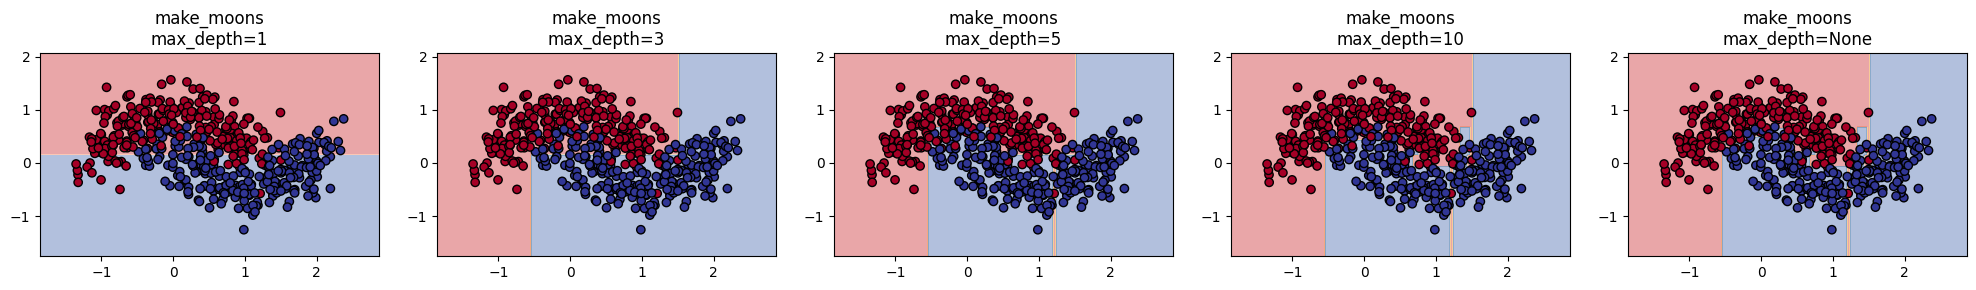

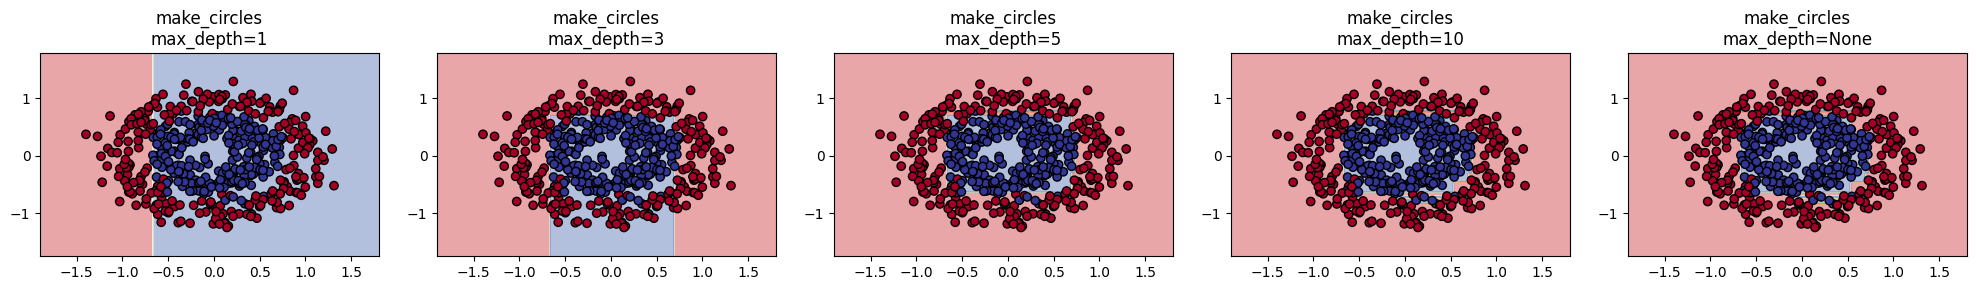

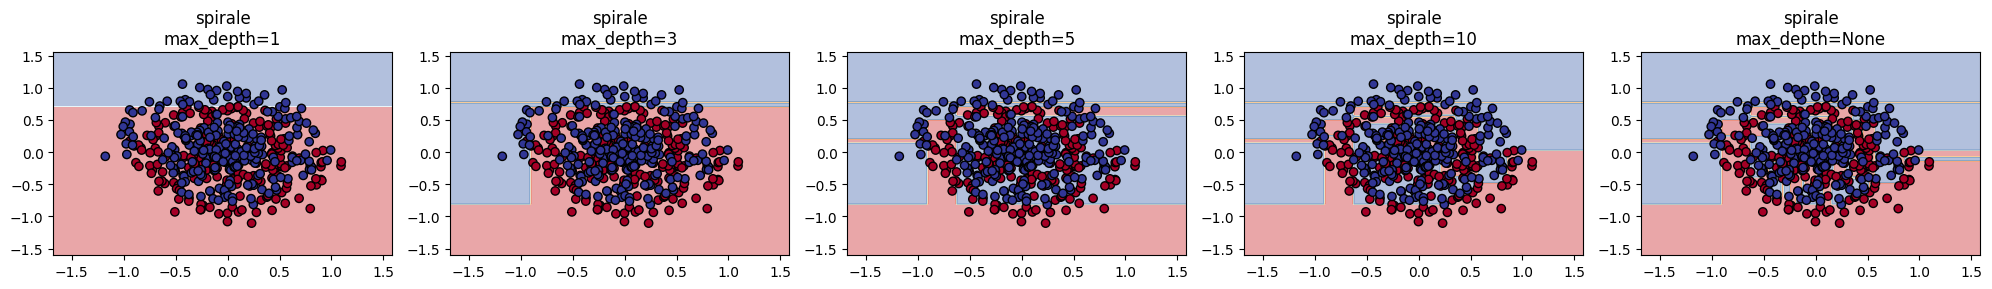

In [12]:
depths = [1, 3, 5, 10, None]

X_moons, y_moons = make_moons(n_samples=500, noise=0.25, random_state=0)
X_circles, y_circles = make_circles(n_samples=500, noise=0.15, factor=0.5, random_state=0)
X_spirals, y_spirals = make_spirals(n_samples=500, noise=0.1, random_state=0)

datasets = [
    ("make_moons", X_moons, y_moons),
    ("make_circles", X_circles, y_circles),
    ("spirale", X_spirals, y_spirals),
]

for name, X, y in datasets:
    fig, axes = plt.subplots(1, len(depths), figsize=(4 * len(depths), 3))

    if len(depths) == 1:
        axes = [axes]

    for ax, depth in zip(axes, depths):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        clf.fit(X, y)

        title = f"{name}\nmax_depth={depth}"
        plot_decision_boundary(clf, X, y, ax, title=title)

    plt.tight_layout()
    plt.show()


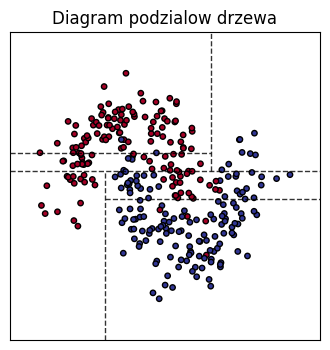

In [13]:
# proste drzewo o glebokosci 3
X_moons, y_moons = make_moons(n_samples=300, noise=0.25, random_state=0)
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_clf.fit(X_moons, y_moons)

fig, ax = plt.subplots(figsize=(4, 4))
visualize_tree_splits(tree_clf, X_moons, y_moons, ax)
plt.show()


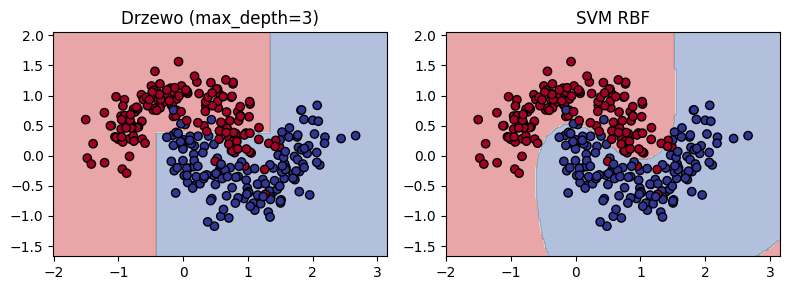

In [ ]:
X_moons, y_moons = make_moons(n_samples=300, noise=0.25, random_state=0)

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_clf.fit(X_moons, y_moons)

svm_clf = SVC(kernel="rbf", gamma="scale", C=1.0, random_state=0)
svm_clf.fit(X_moons, y_moons)

fig, axes = plt.subplots(1, 2, figsize=(8, 3))

plot_decision_boundary(tree_clf, X_moons, y_moons, axes[0],
                       title="Drzewo (max_depth=3)")
plot_decision_boundary(svm_clf, X_moons, y_moons, axes[1],
                       title="SVM RBF")

plt.tight_layout()
plt.show()
